**World Cup Challenge - 2022**

In [1]:
#Librerias necesaria para la implementacion de nuestro modelo

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

## En caso de no tener instalar estos paquetes en un colab o desde su environment

In [2]:
#Manipulacion de datos
import pandas as pd                 #para la manipulacion de datos
import numpy as np                  #para la manipulacion de datos

#Visualizacion de los datos
import matplotlib.pyplot as plt     #para la visualizacion de los datos
import seaborn as sns               
%matplotlib inline                  
plt.style.use('ggplot')             #para la visualizacion de los datos

#No presentar advertencias
import warnings                     #para evitar warnings en la consola
warnings.filterwarnings("ignore")   #para evitar warnings en la consola

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

**Analizamos el DataSet**

In [3]:
results = pd.read_csv('InternationalFootballResults_1872to2022_results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


*Cargamos el DataSet con el nombre "InternationalFootballResults_1872to2022_results.csv"*

In [4]:
# date- fecha del partido
# home_team- el nombre del equipo local
# away_team- el nombre del equipo visitante
# home_score- marcador del equipo local a tiempo completo, incluida la prórroga, sin incluir las tandas de penaltis
# away_score- puntuación del equipo visitante a tiempo completo, incluida la prórroga, sin incluir las tandas de penaltis
# tournament- el nombre del torneo
# city- el nombre de la ciudad/pueblo/unidad administrativa donde se jugó el partido
# country- el nombre del país donde se jugó el partido
# neutral- Columna VERDADERO/FALSO que indica si el partido se jugó en una sede neutral

##Solo se va considerar el home_team, away_team, y la diferencia de goles  para realizar el modelo.
##Lo demas no es importante ya que no importa el lugar y fecha, ya que los partidos se jugaran en Qatar.
##Lo que se intentar es simular la localidad con el ranking de cada equipo, y asi tengan mas chance de ganar.


*Primero vamos agregar mas datos a nuestro DataSet*

In [5]:
# Agregamos la columna de ganador o empate
winner = []
for i in range(len(results['home_team'])):
    if results['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Tie')
results['winning_team'] = winner

# Agregamos la colluman de la diferencia de goles
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,Tie,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,Tie,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,Scotland,3


*Para que el modelo sea mas preciso haremos un filtrado por los equipos que van a jugar en Qatar*

In [6]:
qatar_2022 = ['Qatar','Ecuador,Senegal','Países Bajos',
'Inglaterra','Irán','Estados Unidos','Gales',
'Argentina','Arabia Saudí','México','Polonia',
'Francia','Australia','Dinamarca','Túnez',
'España','Costa Rica','Alemania','Japón',
'Bélgica','Canadá','Marruecos','Croacia',
'Brasil','Serbia','Suiza','Camerún',
'Portugal','Ghana','Uruguay','República de Corea']

In [7]:
# Filtramos los equipos que jugaran cuando estaban como visitantes y locales y elimianmos datos repetidos
df_teams_home = results[results['home_team'].isin(qatar_2022)]
df_teams_away = results[results['away_team'].isin(qatar_2022)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               4809
home_team          4809
away_team          4809
home_score         4809
away_score         4809
tournament         4809
city               4809
country            4809
winning_team       4809
goal_difference    4809
dtype: int64

*Visualizamos como esta quedando el conjunto de datos*

In [8]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference
55,1888-02-04,Gales,Inglaterra,1,5,Campeonato Británico,Crewe,Inglaterra,Inglaterra,4
56,1888-03-03,Gales,Irlanda del Norte,11,0,Campeonato Británico,Wrexham,Gales,Gales,11
62,1889-02-23,Inglaterra,Gales,4,1,Campeonato Británico,Stoke-on-Trent,Inglaterra,Inglaterra,3
63,1889-03-02,Inglaterra,Irlanda del Norte,6,1,Campeonato Británico,Liverpool,Inglaterra,Inglaterra,5
65,1889-04-13,Inglaterra,Escocia,2,3,Campeonato Británico,Londres,Inglaterra,Escocia,1


*El muncial se dio desde 1930, asi que solo manejaremos esos datos*

In [9]:
# Generamos una nueva columna respsctos al a;o para la filtracion
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year

df_teams30 = df_teams[df_teams.match_year >= 1930]
df_teams30.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,winning_team,goal_difference,match_year
1231,1930-01-12,Portugal,Czechoslovakia,1,0,Friendly,Lisbon,Portugal,Portugal,1,1930
1237,1930-02-23,Portugal,France,2,0,Friendly,Porto,Portugal,Portugal,2,1930
1259,1930-05-25,Argentina,Uruguay,1,1,Copa Newton,Buenos Aires,Argentina,Tie,0,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,Argentina,1,1930
1286,1930-07-18,Uruguay,Peru,1,0,FIFA World Cup,Montevideo,Uruguay,Uruguay,1,1930


Ahora con estos cambio, generamos el verdadero DataSet que se usara

In [10]:
df_teams30 = df_teams30.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams30.head()

,home_team,away_team,winning_team
1231,Portugal,Czechoslovakia,Portugal
1237,Portugal,France,Portugal
1259,Argentina,Uruguay,Tie
1281,Argentina,France,Argentina
1286,Uruguay,Peru,Uruguay


*Generamos nuestra Salida y reasignamos nuevos indices*

In [11]:
# 2 -> Si gano el local
# 1 -> si es empate
# 0 -> Si gano el visitante

df_teams30 = df_teams30.reset_index(drop=True)
df_teams30.loc[df_teams30.winning_team == df_teams30.home_team, 'winning_team']= 2
df_teams30.loc[df_teams30.winning_team == 'Tie', 'winning_team']= 1
df_teams30.loc[df_teams30.winning_team == df_teams30.away_team, 'winning_team']= 0

df_teams30.head()

,home_team,away_team,winning_team
0,Portugal,Czechoslovakia,2
1,Portugal,France,2
2,Argentina,Uruguay,1
3,Argentina,France,2
4,Uruguay,Peru,2


In [12]:
#Gracias a get_dummies volvemos nuestras variables categoricas en ficticias numericas
final = pd.get_dummies(df_teams30, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
final.head()

,winning_team,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,...,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Separamos los datos de entrenamiento**

In [13]:
# No separamos mucho para no sobrecargar el modelo
# Separamos los datos que entraran al modelo con la variable de prediccion que seria wininig_team

from sklearn.model_selection import train_test_split

X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [14]:
print("Datos Totales -> ",X.shape)
print("Datos Entrenamiento -> ",X_train.shape)
print("Datos Validacion -> ",X_test.shape)

Datos Totales ->  (4495, 360)
Datos Entrenamiento ->  (3146, 360)
Datos Validacion ->  (1349, 360)


**Aplicacion de modelo**

*Aplicando Modelo Base*

In [15]:
#Aplicamos un modelo de regresion Logistica
from sklearn.linear_model import LogisticRegression

RL = LogisticRegression()                   #Asigna un modelo de regresion
RL.fit(X_train, y_train)                    #Entrenamos un modelo de regresion
score = RL.score(X_train, y_train)          #Score de regresion en el entrenamiento
score2 = RL.score(X_test, y_test)           #Score de regresion en la validacion

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.599
Test set accuracy:  0.505


*No esta nada mal al parecer, pero tenemos que compararlo con otros modelos*

<AxesSubplot: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

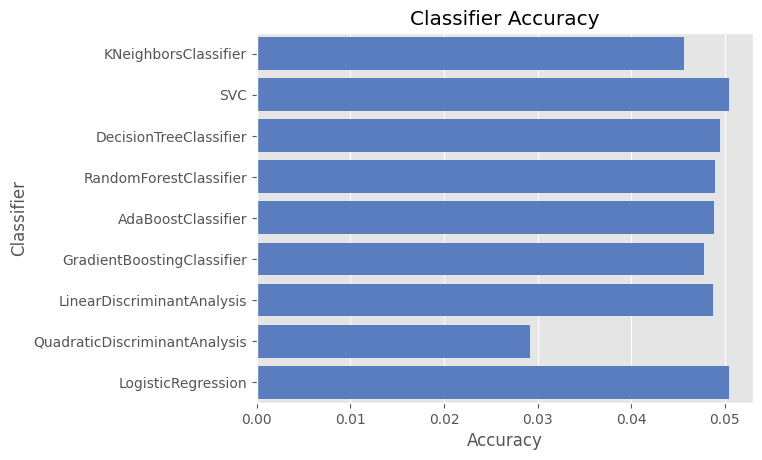

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

acc_dict = {}

# Aplicamos cada modelo
for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    
    # guardamos el resultado del accuracy_score
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

# Guardamos para la visualizacion
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

*Muy curioso lo que sucedio, ahora tenemo que desidir en cual confiar*

In [17]:
print('SVC->',acc_dict['SVC'])
print('LogisticRegression->',acc_dict['LogisticRegression'])

SVC-> 0.05048183839881394
LogisticRegression-> 0.05048183839881394


**Mejorar aun mas el DataSet**

*Intentaremos simular un ranking*

In [18]:

ranking_general = results.groupby(['winning_team'])['goal_difference'].count().reset_index()
ranking_general.sort_values(by=['goal_difference'], inplace=True, ascending=False)
ranking_general = ranking_general.reset_index().drop(['index'],axis=1)
ranking_general = ranking_general.rename_axis('position').reset_index()
ranking_general.head(100)


,position,winning_team,goal_difference
0,0,Tie,9023
1,1,Brazil,600
2,2,England,547
3,3,Germany,544
4,4,Argentina,510
...,...,...,...
95,95,Sudan,126
96,96,Congo,124
97,97,Hong Kong,124
98,98,Canada,123


Ranking respecto a los que solo jugaran

In [19]:
ranking_qatar = df_teams.groupby(['winning_team'])['goal_difference'].count().reset_index()
ranking_qatar.sort_values(by=['goal_difference'], inplace=True, ascending=False)
ranking_qatar = ranking_qatar.reset_index().drop(['index'],axis=1)
ranking_qatar = ranking_qatar.rename_axis('position').reset_index()
ranking_qatar.head(100)

,position,winning_team,goal_difference
0,0,Tie,1175
1,1,Argentina,609
2,2,Uruguay,428
3,3,Portugal,290
4,4,Ghana,281
...,...,...,...
95,95,Indonesia,3
96,96,Escocia,3
97,97,Sudan,2
98,98,Trinidad and Tobago,2


Vemos de que Argentina tiene mas oportunidad de gol en el grupo de los clasficados. y en el general Brazil.

In [20]:
fixtures = pd.read_csv('fixtures.csv')
pred_set = []
fixtures.head()

,Match Number,Round Number,Date,Location,Home Team,Away Team,Group,Result
0,1,1,20/11/2022 16:00,Al Bayt Stadium,Qatar,Ecuador,Group A,NaN
1,3,1,21/11/2022 13:00,Khalifa International Stadium,England,Iran,Group B,NaN
2,2,1,21/11/2022 16:00,Al Thumama Stadium,Senegal,Netherlands,Group A,NaN
3,4,1,21/11/2022 19:00,Ahmad Bin Ali Stadium,USA,Wales,Group B,NaN
4,8,1,22/11/2022 10:00,Lusail Stadium,Argentina,Saudi Arabia,Group C,NaN


In [21]:
# Creamos las posiciones segun el pais para poder simular quien estara de local y quien de visitante
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking_qatar.set_index('winning_team')['position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking_qatar.set_index('winning_team')['position']))

fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Match Number,first_position,second_position,Round Number,Date,Location,Home Team,Away Team,Group,Result
43,44,6.0,12.0,3,01/12/2022 19:00,Al Bayt Stadium,Costa Rica,Germany,Group E,NaN
44,45,4.0,2.0,3,02/12/2022 15:00,Al Janoub Stadium,Ghana,Uruguay,Group H,NaN
45,46,23.0,3.0,3,02/12/2022 15:00,Education City Stadium,Korea Republic,Portugal,Group H,NaN
46,47,8.0,46.0,3,02/12/2022 19:00,Stadium 974,Serbia,Switzerland,Group G,NaN
47,48,90.0,9.0,3,02/12/2022 19:00,Lusail Stadium,Cameroon,Brazil,Group G,NaN


In [22]:
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'away_team': row['Away Team'], 'home_team': row['Home Team'], 'winning_team': None})
    else:
        pred_set.append({'away_team': row['Home Team'], 'home_team': row['Away Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set.head()

,away_team,home_team,winning_team
0,Ecuador,Qatar,None
1,Iran,England,None
2,Senegal,Netherlands,None
3,Wales,USA,None
4,Saudi Arabia,Argentina,None


In [23]:
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahrain,...,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
group_qatar = backup_pred_set.drop(['winning_team'], axis=1)

winner = []
home_goals = []
away_goals = []
predictions = RL.predict(pred_set)
for i in range(fixtures.shape[0]):
    if predictions[i] == 2:
        winner.append(backup_pred_set.iloc[i, 1])
        if (RL.predict_proba(pred_set)[i][2] > 0.7):
            home_goals.append(3)
            away_goals.append(1)
        else:
            home_goals.append(1)
            away_goals.append(0)
            
    elif predictions[i] == 1:
        if (RL.predict_proba(pred_set)[i][2] > RL.predict_proba(pred_set)[i][0]):
            winner.append(backup_pred_set.iloc[i, 1])
            home_goals.append(5)
            away_goals.append(4)
        else:
            winner.append(backup_pred_set.iloc[i, 0])
            home_goals.append(4)
            away_goals.append(5)        
    elif predictions[i] == 0:
        winner.append(backup_pred_set.iloc[i, 0])
        if (RL.predict_proba(pred_set)[i][1] > 0.60):
            home_goals.append(3)
            away_goals.append(1)
        else:
            home_goals.append(1)
            away_goals.append(0)
    

group_qatar['winning_team'] = winner
group_qatar['home_goals'] = home_goals
group_qatar['away_goals'] = away_goals
group_qatar['group'] = fixtures['Group']
group_qatar['goal_difference'] = np.absolute(group_qatar['home_goals'] - group_qatar['away_goals'])
group_qatar = group_qatar.drop(['home_goals','away_goals'], axis=1)
group_qatar.head(100)

group_qatar.groupby(['group','winning_team'],sort=True)["goal_difference"].count()


group    winning_team
Group A  Ecuador         2
         Netherlands     3
         Senegal         1
Group B  England         3
         Iran            1
         USA             2
Group C  Argentina       3
         Mexico          1
         Poland          2
Group D  Australia       2
         Denmark         1
         France          3
Group E  Costa Rica      2
         Germany         3
         Spain           1
Group F  Belgium         3
         Canada          1
         Morocco         2
Group G  Brazil          3
         Cameroon        2
         Serbia          1
Group H  Ghana           1
         Portugal        2
         Uruguay         3
Name: goal_difference, dtype: int64

Esta funcion nos ayudara para realizar todo automaticamente, y solamente pasar los equipos que jugaran en las distintas etapas

In [25]:
def clean_and_predict(matches, ranking, final, logreg):

    # Initialization of auxiliary list for data cleaning

    winner = []
    home_goals = []
    away_goals = []
    group_qatar_1 = pd.DataFrame()
    positions = []

    # Loop to retrieve each team's position according to FIFA ranking
    for match in matches:
        positions.append(ranking.loc[ranking['winning_team'] == match[0],'position'].iloc[0])
        positions.append(ranking.loc[ranking['winning_team'] == match[1],'position'].iloc[0])
    
    # Creating the DataFrame for prediction
    pred_set = []

    # Initializing iterators for while loop
    i = 0
    j = 0

    # 'i' will be the iterator for the 'positions' list, and 'j' for the list of matches (list of tuples)
    while i < len(positions):
        dict1 = {}

        # If position of first team is better, he will be the 'home' team, and vice-versa
        if positions[i] < positions[i + 1]:
            dict1.update({'away_team': matches[j][1], 'home_team': matches[j][0]})
        else:
            dict1.update({'away_team': matches[j][0], 'home_team': matches[j][1]})
        pred_set.append(dict1)
        i += 2
        j += 1

    # Convert list into DataFrame
    pred_set = pd.DataFrame(pred_set)
    backup_pred_set = pred_set

    pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

    # Add missing columns compared to the model's training dataset
    missing_cols2 = set(final.columns) - set(pred_set.columns)
    for c in missing_cols2:
        pred_set[c] = 0
    pred_set = pred_set[final.columns]

    # Remove winning team column
    pred_set = pred_set.drop(['winning_team'], axis=1)

    # Predict!
    predictions = logreg.predict(pred_set)
    for i in range(len(pred_set)):
        if predictions[i] == 2:
            winner.append(backup_pred_set.iloc[i, 1])
            if (RL.predict_proba(pred_set)[i][2] > 0.7):
                home_goals.append(3)
                away_goals.append(1)
            else:
                home_goals.append(1)
                away_goals.append(0)
        elif predictions[i] == 1:
            if (RL.predict_proba(pred_set)[i][2] > RL.predict_proba(pred_set)[i][0]):
                winner.append(backup_pred_set.iloc[i, 1])
                home_goals.append(5)
                away_goals.append(4)
            else:
                winner.append(backup_pred_set.iloc[i, 0])
                home_goals.append(4)
                away_goals.append(5)
            
        elif predictions[i] == 0:
            winner.append(backup_pred_set.iloc[i, 0])
            if (RL.predict_proba(pred_set)[i][1] > 0.60):
                home_goals.append(3)
                away_goals.append(1)
            else:
                home_goals.append(1)
                away_goals.append(0)
    group_qatar_1['winning_team'] = winner
    group_qatar_1['home_goals'] = home_goals
    group_qatar_1['away_goals'] = away_goals
    return group_qatar_1

In [43]:
def ShowResults(etapa,group, ranking_general, final, RL):
    result =  clean_and_predict(group, ranking_general, final, RL)

    resultados = pd.DataFrame();
    resultados[etapa] = group
    resultados['wining_team'] = result['winning_team']
    resultados['goal_difference'] = np.absolute(result['home_goals'] - result['away_goals'])
    print(resultados.head(10))
    


**Octavos de Final**

In [44]:
#Segun lo anteior estos seian los equipos a jugar en los 16avos
group_8 = [('Netherlands', 'USA'),
            ('Argentina', 'Australia'),
            ('France', 'Poland'),
            ('England', 'Ecuador'),
            ('Germany', 'Morocco'),
            ('Brazil', 'Portugal'),
            ('Belgium', 'Costa Rica'),
            ('Uruguay', 'Cameroon')]
ShowResults('Octavos',group_8, ranking_general, final, RL)

                  Octavos  wining_team  goal_difference
0      (Netherlands, USA)  Netherlands                1
1  (Argentina, Australia)    Argentina                2
2        (France, Poland)       France                1
3      (England, Ecuador)      England                1
4      (Germany, Morocco)      Germany                1
5      (Brazil, Portugal)       Brazil                2
6   (Belgium, Costa Rica)      Belgium                2
7     (Uruguay, Cameroon)      Uruguay                1


**Cuartos de Final**

In [45]:
group_4 = [('Netherlands', 'Argentina'),
            ('Germany', 'Brazil'),
            ('England', 'France'),
            ('Belgium', 'Uruguay')]

ShowResults('Cuartos',group_4, ranking_qatar, final, RL)

                    Cuartos wining_team  goal_difference
0  (Netherlands, Argentina)   Argentina                1
1         (Germany, Brazil)      Brazil                1
2         (England, France)      France                1
3        (Belgium, Uruguay)     Uruguay                1


**Semifinales**

In [47]:
group_2 = [('Argentina', 'Brazil'),
            ('France', 'Uruguay')]

ShowResults('Semifinal',group_2, ranking_qatar, final, RL)

             Semifinal wining_team  goal_difference
0  (Argentina, Brazil)   Argentina                1
1    (France, Uruguay)     Uruguay                1


**Final**

In [49]:
group_1 = [('Argentina', 'Uruguay')]
result_1 =  clean_and_predict(group_1, ranking_qatar, final, RL)

ShowResults('Final',group_1, ranking_qatar, final, RL)

                  Final wining_team  goal_difference
0  (Argentina, Uruguay)   Argentina                1


**tercer Puesto**

In [50]:
# List of tuples before we arrange the teams in home and away
group_3 = [('Brazil', 'France')]

ShowResults('Tercer',group_3, ranking_qatar, final, RL)


             Tercer wining_team  goal_difference
0  (Brazil, France)      Brazil                1
